# Phase 1: Introduction
Participants are faced with a multi-armed bandit problem where they sample pill containers. In this experiment, they act as scientists trying to treat ten diseased rats. They are told that these rats have a 50% chance of living and are able to draw potentially-curing pills from three distinct containers. After they draw a pill, they feed it to a rat and get a result pertaining to whether the rat lived or died. Their job is to make an scientific assessment about contents of each container.

What the participants don't know is that all three containers contain placebo pills. No matter which container they choose from, the rat has a 50% chance of living. The participants have a limited amount of draws and are incentivized not only to produce accurate assessments and save the lives of their rats, but also to be published. This project aims to capture the “reproducibility crisis” in science, which is fundamentally a problem of over-reporting spurious results. Our question is "Why does information aggregation in science lead to a reproducibility crisis?" Our hypothesis is that different simulation settings will affect the frequency of false results being published.

## *Setting: Sampling pills*

The following shows the prompts and images for the this setting.

In [63]:
# Prompt to the prober in the drug safety setting
prompt_drugs = "In this experiment, you are a researcher conducting a critical investigation into a disease that is affecting a population of rats. You know that if a rat has the disease, they have a 50% chance of living. You are responsible for ten rats. One day, you come across three pill containers, each of which contains a different type of drug. You believe that the contents of the containers have the potential to save your rats. However, you don't know anything about the drugs in each container. For each rat, draw from any of the containers and find out if the resultant pill was able to cure the rat. You can sample a pill from a container by clicking on it. You will see your next instructions after sampling."
print(prompt_drugs)

In this experiment, you are a researcher conducting a critical investigation into a disease that is affecting a population of rats. You know that if a rat has the disease, they have a 50% chance of living. You are responsible for ten rats. One day, you come across three pill containers, each of which contains a different type of drug. You believe that the contents of the containers have the potential to save your rats. However, you don't know anything about the drugs in each container. For each rat, draw from any of the containers and find out if the resultant pill was able to cure the rat. You can sample a pill from a container by clicking on it. You will see your next instructions after sampling.


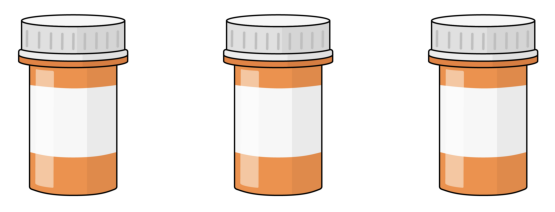

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = "pill_image.png"

# Desired width for each image
image_width = 200  # Adjust this value according to your preference

# Display three copies of the resized image side by side
fig, axs = plt.subplots(1, 3, figsize=(image_width * 3 / 80, image_width / 80))
for ax in axs:
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

# Phase 2: Sampling

The participants will now click on the images for a total of ten samples.

## *Defining the distributions*

The underlying distribution is binomial, meaning that there is a certain probability that the pill drawn cures the rat and a certain probability that the pill drawn kills the rat. All of the containers contain pills that are secretly placebos. This is not known to the participant. What this means is that the chance that any pill cures the rat is just the rat's survival rate: 50%.

In [65]:
# Defining urns
import numpy as np
import random

class Urn:
    def __init__(self):
        pass  # No need for mean and std

    def draw(self):
        sample = random.choice([0, 1])
        if sample == 0:
            print("   You fed your pill to the rat, but it died.")
        elif sample == 1:
            print("   You fed your pill to the rat and it survived!")
        return(sample)
    
urn = Urn()
sample = urn.draw()

   You fed your pill to the rat and it survived!


In [66]:
# Make a setting of three urns
class ExperimentSetting:
    def __init__(self):
        self.urns = [Urn() for _ in range(3)]

# Setting with equal distribution
setting = ExperimentSetting()

## *Creating participants who take draws*

Participants will take one draw for each of their ten rats.
- They can take draws from a particular bin with the add_sample_from_bin function. 
- Their draws are recorded in the self.samples array.

In [67]:
# Keeps track of an individual's history and setting across ten samples for their distribution
class Individual:
    def __init__(self):
        self.samples = []
        self.experiment_setting = ExperimentSetting()

    def add_sample_from_bin(self, bin_number):
        print(f"Sampling from bin {bin_number}")
        value = self.experiment_setting.urns[bin_number].draw()
        self.samples.append({"bin": bin_number, "value":value})
        
    def print_results(self):        
        # Dictionary to store counts for each bin
        bin_counts = {}

        for sample in self.samples:
            bin_number = sample['bin']
            value = sample['value']

            # Initialize counts if the bin is encountered for the first time
            if bin_number not in bin_counts:
                bin_counts[bin_number] = {'dead': 0, 'alive': 0}

            # Update counts based on the drawn value
            if value == 0:
                bin_counts[bin_number]['dead'] += 1
            else:
                bin_counts[bin_number]['alive'] += 1

        # Display total counts and death rate percentage for each bin
        for bin_number, counts in bin_counts.items():
            total_samples = counts['dead'] + counts['alive']
            survival_rate_percentage = (counts['alive'] / total_samples) * 100 if total_samples > 0 else 0

            print(f"\nStatistics for bin {bin_number}:")
            print(f"   Total Samples: {total_samples}")
            print(f"   Number of Dead Rats: {counts['dead']}")
            print(f"   Number of Alive Rats: {counts['alive']}")
            print(f"   Survival Rate: {survival_rate_percentage:.2f}%")


In [68]:
# Individual history for someone in the equal distribution who samples 10 random bins
individual = Individual()
for i in range(1, 10):
    random_number = random.random()
    if random_number < 1/3:
        individual.add_sample_from_bin(0)
    elif random_number < 2/3:
        individual.add_sample_from_bin(1)
    else:
        individual.add_sample_from_bin(2)

Sampling from bin 1
   You fed your pill to the rat and it survived!
Sampling from bin 1
   You fed your pill to the rat and it survived!
Sampling from bin 1
   You fed your pill to the rat, but it died.
Sampling from bin 2
   You fed your pill to the rat and it survived!
Sampling from bin 1
   You fed your pill to the rat and it survived!
Sampling from bin 1
   You fed your pill to the rat and it survived!
Sampling from bin 0
   You fed your pill to the rat and it survived!
Sampling from bin 0
   You fed your pill to the rat and it survived!
Sampling from bin 0
   You fed your pill to the rat, but it died.


In [69]:
individual.print_results()


Statistics for bin 1:
   Total Samples: 5
   Number of Dead Rats: 1
   Number of Alive Rats: 4
   Survival Rate: 80.00%

Statistics for bin 2:
   Total Samples: 1
   Number of Dead Rats: 0
   Number of Alive Rats: 1
   Survival Rate: 100.00%

Statistics for bin 0:
   Total Samples: 3
   Number of Dead Rats: 1
   Number of Alive Rats: 2
   Survival Rate: 66.67%


# Phase 3: Reporting results

Now, the participants are going to have the option to report their findings to a board. The board will make an aggregated decision about which findings to publish to the wider public. This is where it gets interesting. We will tell the participants that their objective is not only to report accurate information, but also to publish their findings that they think will be interesting to the community in a scientific journal.


We will give the participants one of three options for how to report their findings. Our main parameter here is changing the set of reports that the participants could issue given their data.
- Pick a single urn and report the survival rate of its pill contents.
- Pick a single urn and report the total number of rats that died and rats that stayed alive
- Pick a single urn and choose a set of data to publish

## *Participant prompts*

The following shows the prompts that each user is given after they have taken ten draws.

In [70]:
prompt_reporting_drugs = "Thank you for taking your samples. Now, you will need to report your findings. Remember that your objective is not only to report accurate information, but also to publish the findings that you think will be interesting to the community in a scientific journal. You can only publish findings about one of the containers.\n"
print(prompt_reporting_drugs)

Thank you for taking your samples. Now, you will need to report your findings. Remember that your objective is not only to report accurate information, but also to publish the findings that you think will be interesting to the community in a scientific journal. You can only publish findings about one of the containers.



In [71]:
class ReportingStructure:
    def __init__(self, bandwidth_type, individual):
        self.bandwidth_type = bandwidth_type
        self.urn_assessment = []
        self.individual = individual
        self.samples = individual.samples
        self.urn_choice = -1

    def report_findings(self, individual):
        print(prompt_reporting_drugs)
        
        if self.bandwidth_type == "headline":
            print("Choose a container. Report a value for the survival rates of rats who take pills from that container. You are free to report a rate of your choice (a real result, a result you think will get published, or something else)")

            urn_assessment = []
            while True:
                try:
                    urn_choice = int(input("Container number: "))
                    if (1 <= urn_choice <= 3 and any(sample['bin'] == urn_choice - 1 for sample in self.individual.samples)):
                        self.urn_choice = urn_choice
                        break
                    else:
                        print("Please enter a valid urn number (1, 2, or 3) that you have sampled from.")
                except ValueError:
                    print("Please enter a valid integer.")

            # Calculate the empirically found survival rate for the chosen container
            container_samples = [sample['value'] for sample in self.individual.samples if sample['bin'] == urn_choice - 1]
            empirical_survival_rate = (sum(container_samples) / len(container_samples)) if container_samples else 0
            print(f"The empirically found survival rate for Container {urn_choice} is: {empirical_survival_rate:.2f}")

            while True:
                try:
                    survival_rate = float(input(f"Report survival rate: "))
                    if survival_rate >= 0 and survival_rate <=1:
                        urn_assessment.append(survival_rate)
                        break
                    else:
                        print("Please enter a valid value between 0 and 1")
                except ValueError:
                    print("Please enter a valid integer.")
                
            print("Thank you for your report.")
            self.urn_assessment = urn_assessment

        elif self.bandwidth_type == "full":
            print("Choose a container. Report the number of rats that survived and died when taking pills from that container. You are free to report values of your choice (a real result, a result you think will get published, or something else)")
            
            urn_assessment = []
            while True:
                try:
                    urn_choice = int(input("Container number: "))
                    if (1 <= urn_choice <= 3 and any(sample['bin'] == urn_choice - 1 for sample in self.individual.samples)):
                        self.urn_choice = urn_choice
                        break
                    else:
                        print("Please enter a valid urn number (1, 2, or 3) that you have sampled from.")
                except ValueError:
                    print("Please enter a valid integer.")
                    
            # Calculate the empirically found number of rats that survived and died for the chosen container
            container_samples = [sample['value'] for sample in self.individual.samples if sample['bin'] == urn_choice - 1]
            empirical_num_survived = container_samples.count(1)
            empirical_num_died = container_samples.count(0)
            print(f"The empirically found number of rats that survived for Container {urn_choice}: {empirical_num_survived}")
            print(f"The empirically found number of rats that died for Container {urn_choice}: {empirical_num_died}")
            
            while True:
                try:
                    num_survived = int(input(f"Report the number of rats survived for urn {urn_choice}: "))
                    num_died = int(input(f"Report the number of rats that died for urn {urn_choice}: "))
                    break
                except ValueError:
                    print("Please enter valid integers for the number of rats.")

            urn_assessment.append({"urn": urn_choice, "num_survived": num_survived, "num_died": num_died})
            print("Thank you for your report.")
            self.urn_assessment = urn_assessment
            
        elif self.bandwidth_type == "subset":
            print("Choose a container. Report a subset of your data for that container.")

            urn_assessment = []

            while True:
                try:
                    urn_choice = int(input("Container number: "))
                    if 1 <= urn_choice <= 3 and any(sample['bin'] == urn_choice - 1 for sample in self.individual.samples):
                        break
                    else:
                        print("Please enter a valid urn number (1, 2, or 3) that you have sampled from.")
                except ValueError:
                    print("Please enter a valid integer.")

            container_samples = [sample for sample in self.individual.samples if sample['bin'] == urn_choice - 1]
            valid_indices = [idx + 1 for idx, sample in enumerate(container_samples)]

            print(f"Your available samples for Container {urn_choice}:")
            for idx, sample in enumerate(container_samples):
                if sample['value'] == 0:
                    print(f"Sample #{idx + 1}- Rat died")
                elif sample['value'] == 1:
                    print(f"Sample #{idx + 1}- Rat survived")

            while True:
                try:
                    subset_indices = input("Enter the indices of the samples you want to include (comma-separated): ")
                    subset_indices = [int(idx.strip()) for idx in subset_indices.split(",") if int(idx.strip()) in valid_indices]

                    # Check for duplicate indices
                    if not subset_indices or len(subset_indices) != len(set(subset_indices)):
                        print("Please enter valid and non-duplicate integer indices from the available options.")
                        continue

                    break
                except ValueError:
                    print("Please enter valid integer indices separated by commas.")

            subset_data = [container_samples[idx - 1] for idx in subset_indices]
            urn_assessment.append({"urn": urn_choice, "subset_data": subset_data})

            print("Thank you for your report.")
            self.urn_assessment = urn_assessment

In [73]:
# Example usage with binary headlines
headline = ReportingStructure(bandwidth_type="headline", individual=individual)
headline.report_findings(individual)

Thank you for taking your samples. Now, you will need to report your findings. Remember that your objective is not only to report accurate information, but also to publish the findings that you think will be interesting to the community in a scientific journal. You can only publish findings about one of the containers.

Choose a container. Report a value for the survival rates of rats who take pills from that container. You are free to report a rate of your choice (a real result, a result you think will get published, or something else)
Container number: 2
The empirically found survival rate for Container 2 is: 0.80
Report survival rate: 0.8
Thank you for your report.


In [74]:
# Example usage with full reporting
full = ReportingStructure(bandwidth_type="full", individual=individual)
full.report_findings(individual)

Thank you for taking your samples. Now, you will need to report your findings. Remember that your objective is not only to report accurate information, but also to publish the findings that you think will be interesting to the community in a scientific journal. You can only publish findings about one of the containers.

Choose a container. Report the number of rats that survived and died when taking pills from that container. You are free to report values of your choice (a real result, a result you think will get published, or something else)
Container number: 3
The empirically found number of rats that survived for Container 3: 1
The empirically found number of rats that died for Container 3: 0
Report the number of rats survived for urn 3: 1
Report the number of rats that died for urn 3: 0
Thank you for your report.


In [75]:
# Example usage with partial information
subset = ReportingStructure(bandwidth_type="subset", individual=individual)
subset.report_findings(individual)

Thank you for taking your samples. Now, you will need to report your findings. Remember that your objective is not only to report accurate information, but also to publish the findings that you think will be interesting to the community in a scientific journal. You can only publish findings about one of the containers.

Choose a container. Report a subset of your data for that container.
Container number: 2
Your available samples for Container 2:
Sample #1- Rat survived
Sample #2- Rat survived
Sample #3- Rat died
Sample #4- Rat survived
Sample #5- Rat survived
Enter the indices of the samples you want to include (comma-separated): 1, 2, 4, 5
Thank you for your report.
